In [ ]:
!wget -O data.zip https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=1

--2021-07-12 14:37:06--  https://www.dropbox.com/s/9w8nmj791c9ogsx/data_upload_v3.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9w8nmj791c9ogsx/data_upload_v3.zip [following]
--2021-07-12 14:37:06--  https://www.dropbox.com/s/dl/9w8nmj791c9ogsx/data_upload_v3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69a03edb83d25921b506ab311b.dl.dropboxusercontent.com/cd/0/get/BSKMr4v3vjOz7r6QQYVrpoAY_nDe1UnmOuKuj3tZz4kpJ3PlLlGYa60qSQ8XygDjHFdfRxYA93hDmYL6GcCwADt80abVNFpswBIz7cVI-eGz1ZrPSeie2ecAvlkzTFlLpi7RyohDBgYbOFHGvLfnRFo5/file?dl=1# [following]
--2021-07-12 14:37:06--  https://uc69a03edb83d25921b506ab311b.dl.dropboxusercontent.com/cd/0/get/BSKMr4v3vjOz7r6QQYVrpoAY_nDe1UnmOuKuj3tZz4kpJ3PlLlGYa60qSQ8XygDjHFdfR

In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_upload_v3/test/non/Atelectasis/patient04316-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04347-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04382-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04437-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04466-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04689-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04733-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study4-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04826-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient049

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 20
LEARNING_RATE = 0.0001
MOMENTUM = 0.9
EPOCHS = 100

train_data_dir = "data_upload_v3/train"
test_data_dir = "data_upload_v3/test"

[2000, 84]

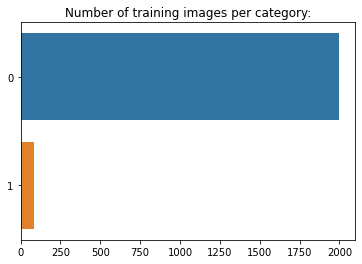

In [ ]:
import os

category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")
img_pr_cat

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from glob import glob

images = glob("data_upload_v3/train/1/*")
datagen = ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

for image in images:
    img = load_img(image)  
    x = img_to_array(img)
    x = x.reshape((1, ) + x.shape)  

    it = datagen.flow(x, batch_size=1, save_to_dir='data_upload_v3/train/1', save_prefix='covid', save_format='jpeg')
    for i in range(5):
      it.next()

In [ ]:
train_datagen = ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

test_datagen =  ImageDataGenerator(
    brightness_range=(0.4, 0.6),
    horizontal_flip=True
)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, 
    class_mode="binary",
    shuffle=True
)

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE, 
    class_mode="binary",
    shuffle=True
)

Total number of images for "training":
Found 2491 images belonging to 2 classes.
Total number of images for "testing":
Found 3100 images belonging to 2 classes.


In [ ]:
!rm -r data_upload_v3/train/.ipynb_checkpoints

rm: cannot remove 'data_upload_v3/train/.ipynb_checkpoints': No such file or directory


In [ ]:
!rm -r data_upload_v3/test/.ipynb_checkpoints

rm: cannot remove 'data_upload_v3/test/.ipynb_checkpoints': No such file or directory


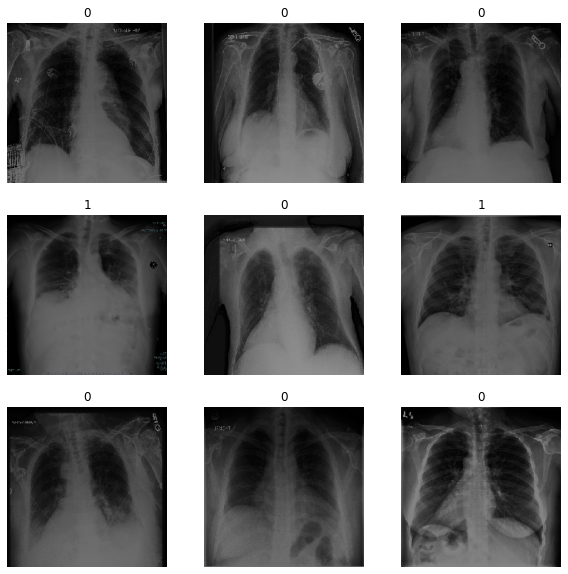

In [ ]:
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetB7(input_shape=IMG_SHAPE,
                                                  include_top=False,
                                                  weights='imagenet')

258080768/258076736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
image_batch, label_batch = next(train_generator)
preprocess_batch = preprocess_input(image_batch)
print(preprocess_batch.shape)

(20, 224, 224, 3)


In [ ]:
feature_batch = base_model(preprocess_batch)
print(feature_batch.shape)

(20, 7, 7, 2560)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 2560)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(20, 1)


In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.2, name='SensitivityAtSpecificity'),
      tf.keras.metrics.SpecificityAtSensitivity(0.2, name='SpecificityAtSensitivity')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=metrics)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2561      
Total params: 64,100,248
Trainable params: 2,561
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
initial_results = model.evaluate(test_generator)
print("initial results:")
for name, value in zip(model.metrics_names, initial_results):
  print(name, ': ', value)

155/155 [==============================] - 43s 239ms/step - loss: 0.6869 - tp: 54.0000 - fp: 1374.0000 - tn: 1626.0000 - fn: 46.0000 - accuracy: 0.5419 - precision: 0.0378 - recall: 0.5400 - SensitivityAtSpecificity: 0.7700 - SpecificityAtSensitivity: 0.8550
initial results:
loss :  0.6868695616722107
tp :  54.0
fp :  1374.0
tn :  1626.0
fn :  46.0
accuracy :  0.5419355034828186
precision :  0.03781512752175331
recall :  0.5400000214576721
SensitivityAtSpecificity :  0.7699999809265137
SpecificityAtSensitivity :  0.8550000190734863


In [ ]:
class_weight = {0: 2494/4000, 1: 2494/988}
class_weight

{0: 0.6235, 1: 2.5242914979757085}

In [ ]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
125/125 [==============================] - 88s 577ms/step - loss: 0.4992 - tp: 362.0000 - fp: 357.0000 - tn: 1643.0000 - fn: 129.0000 - accuracy: 0.8049 - precision: 0.5035 - recall: 0.7373 - SensitivityAtSpecificity: 0.9980 - SpecificityAtSensitivity: 0.9985 - val_loss: 0.3004 - val_tp: 59.0000 - val_fp: 122.0000 - val_tn: 2878.0000 - val_fn: 41.0000 - val_accuracy: 0.9474 - val_precision: 0.3260 - val_recall: 0.5900 - val_SensitivityAtSpecificity: 1.0000 - val_SpecificityAtSensitivity: 0.9990
Epoch 2/50
125/125 [==============================] - 71s 567ms/step - loss: 0.3184 - tp: 435.0000 - fp: 147.0000 - tn: 1853.0000 - fn: 56.0000 - accuracy: 0.9185 - precision: 0.7474 - recall: 0.8859 - SensitivityAtSpecificity: 1.0000 - SpecificityAtSensitivity: 1.0000 - val_loss: 0.2160 - val_tp: 67.0000 - val_fp: 89.0000 - val_tn: 2911.0000 - val_

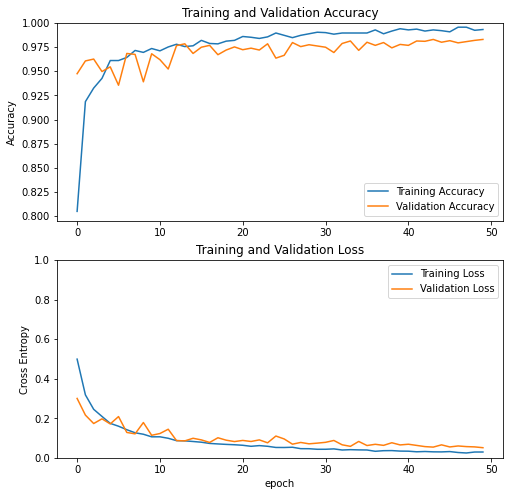

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
results = model.evaluate(test_generator)
print("final results:")
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)

155/155 [==============================] - 38s 244ms/step - loss: 0.0529 - tp: 82.0000 - fp: 34.0000 - tn: 2966.0000 - fn: 18.0000 - accuracy: 0.9832 - precision: 0.7069 - recall: 0.8200 - SensitivityAtSpecificity: 0.9500 - SpecificityAtSensitivity: 1.0000
final results:
loss :  0.05289782956242561
tp :  82.0
fp :  34.0
tn :  2966.0
fn :  18.0
accuracy :  0.9832258224487305
precision :  0.7068965435028076
recall :  0.8199999928474426
SensitivityAtSpecificity :  0.949999988079071
SpecificityAtSensitivity :  1.0


In [ ]:
test_labels = test_generator.labels
test_predictions = model.predict(test_generator)

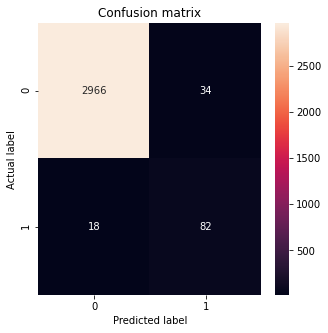

In [ ]:
res = dict(zip(model.metrics_names, results))
cm = [[int(res['tn']), int(res['fp'])],
      [int(res['fn']), int(res['tp'])]]

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

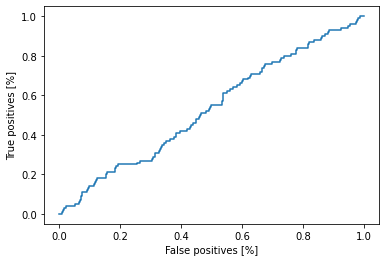

array([1.99999821e+00, 9.99998212e-01, 9.94663000e-01, 9.94509757e-01,
       9.89760101e-01, 9.84107614e-01, 9.51387942e-01, 9.50328887e-01,
       8.65448654e-01, 8.63436997e-01, 2.02433914e-01, 1.95675373e-01,
       1.32555202e-01, 1.31972715e-01, 1.16761088e-01, 1.14772648e-01,
       1.04323663e-01, 1.03157073e-01, 1.00138329e-01, 9.86014307e-02,
       9.52967033e-02, 9.41605195e-02, 9.05658975e-02, 8.99512246e-02,
       6.11863248e-02, 6.07883818e-02, 5.39915487e-02, 5.34217879e-02,
       5.20157516e-02, 5.16744666e-02, 3.85922007e-02, 3.84927876e-02,
       3.60452458e-02, 3.59499492e-02, 3.34242545e-02, 3.33500877e-02,
       3.21898721e-02, 3.20116580e-02, 2.00939476e-02, 2.00160276e-02,
       1.98684670e-02, 1.98102165e-02, 1.90098044e-02, 1.89698357e-02,
       1.25205126e-02, 1.24422396e-02, 1.21656889e-02, 1.21404948e-02,
       1.08208722e-02, 1.07217617e-02, 5.22202300e-03, 5.17233182e-03,
       4.68137348e-03, 4.66280058e-03, 3.05457530e-03, 3.04778432e-03,
      

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(test_labels, test_predictions,pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.show()
threshold

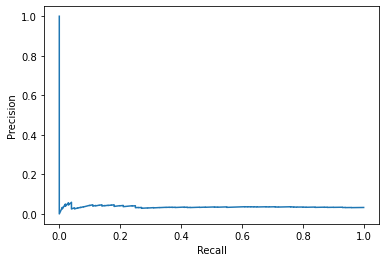

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()